In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import math
from sklearn.impute import SimpleImputer
import numpy as np


In [118]:
df = pd.read_csv('BostonHousing.csv')

X = df.iloc[:, :13].values
y = df.iloc[:, 13].values

feature_names = df.columns[:13].tolist()
selected_features = feature_names

print(f"Выбранные признаки: {selected_features}")
print(f"Размерность признаков: {X.shape}")
print(f"Размерность целевой переменной: {y.shape}")

Выбранные признаки: ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
Размерность признаков: (506, 13)
Размерность целевой переменной: (506,)


In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_array = np.array(X_train, dtype=np.float64)
X_test_array = np.array(X_test, dtype=np.float64)
y_train_array = np.array(y_train, dtype=np.float64)
y_test_array = np.array(y_test, dtype=np.float64)

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_array)
X_test_imputed = imputer.transform(X_test_array)

In [120]:
class LinearRegressionGradientDescent:
    def __init__(self, learning_rate=0.01, n_iterations=1000, tolerance=1e-6):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.tolerance = tolerance
        self.weights = None
        self.bias = None
        self.cost_history = []

    def _compute_cost(self, X, y):
        m = len(y)
        predictions = []
        for i in range(len(X)):
            pred = self.bias
            for j in range(len(X[i])):
                pred += X[i][j] * self.weights[j]
            predictions.append(pred)

        cost = 0
        for i in range(len(y)):
            cost += (predictions[i] - y[i]) ** 2
        cost = cost / (2 * m)
        return cost

    def _compute_gradients(self, X, y):
        m = len(y)
        predictions = []
        for i in range(len(X)):
            pred = self.bias
            for j in range(len(X[i])):
                pred += X[i][j] * self.weights[j]
            predictions.append(pred)

        dw = [0] * len(self.weights)
        for j in range(len(self.weights)):
            partial_derivative = 0
            for i in range(len(X)):
                partial_derivative += (predictions[i] - y[i]) * X[i][j]
            dw[j] = partial_derivative / m
        db = 0
        for i in range(len(y)):
            db += (predictions[i] - y[i])
        db = db / m

        return dw, db

    def fit(self, X, y):
        n_features = len(X[0])
        self.weights = [0] * n_features
        self.bias = 0

        prev_cost = float('inf')
        for iteration in range(self.n_iterations):
            dw, db = self._compute_gradients(X, y)

            for j in range(len(self.weights)):
                self.weights[j] -= self.learning_rate * dw[j]
            self.bias -= self.learning_rate * db

            cost = self._compute_cost(X, y)
            self.cost_history.append(cost)

            if abs(prev_cost - cost) < self.tolerance:
                break
            prev_cost = cost

    def predict(self, X):
        predictions = []
        for i in range(len(X)):
            pred = self.bias
            for j in range(len(X[i])):
                pred += X[i][j] * self.weights[j]
            predictions.append(pred)
        return predictions

    def get_params(self):
        return self.weights, self.bias

In [121]:
def normalize_features(X_train, X_test):
    n_features = len(X_train[0])
    X_mean = [0] * n_features
    X_std = [0] * n_features

    for i in range(len(X_train)):
        for j in range(n_features):
            X_mean[j] += X_train[i][j]

    for j in range(n_features):
        X_mean[j] /= len(X_train)

    for i in range(len(X_train)):
        for j in range(n_features):
            X_std[j] += (X_train[i][j] - X_mean[j]) ** 2

    for j in range(n_features):
        X_std[j] = (X_std[j] / len(X_train)) ** 0.5
        if X_std[j] == 0:
            X_std[j] = 1

    X_train_normalized = []
    for i in range(len(X_train)):
        row = []
        for j in range(n_features):
            row.append((X_train[i][j] - X_mean[j]) / X_std[j])
        X_train_normalized.append(row)

    X_test_normalized = []
    for i in range(len(X_test)):
        row = []
        for j in range(n_features):
            row.append((X_test[i][j] - X_mean[j]) / X_std[j])
        X_test_normalized.append(row)

    return X_train_normalized, X_test_normalized, X_mean, X_std

In [122]:
X_train_list = X_train_imputed.tolist()
X_test_list = X_test_imputed.tolist()

X_train_norm, X_test_norm, X_mean, X_std = normalize_features(X_train_list, X_test_list)


model_gd = LinearRegressionGradientDescent(learning_rate=0.01, n_iterations=1000)
model_gd.fit(X_train_norm, y_train)

model_sklearn = LinearRegression()
model_sklearn.fit(X_train_norm, y_train)

y_pred_gd = model_gd.predict(X_test_norm)
y_pred_sklearn = model_sklearn.predict(X_test_norm)


In [123]:
def calculate_metrics(y_true, y_pred):
    mse = 0
    for i in range(len(y_true)):
        mse += (y_true[i] - y_pred[i]) ** 2
    mse /= len(y_true)

    mae = 0
    for i in range(len(y_true)):
        mae += abs(y_true[i] - y_pred[i])
    mae /= len(y_true)

    return mse, mae

mse_gd, mae_gd = calculate_metrics(y_test, y_pred_gd)
mse_sklearn, mae_sklearn = calculate_metrics(y_test, y_pred_sklearn)

РЕЗУЛЬТАТЫ СРАВНЕНИЯ
  MSE:  25.4524
  MAE:  3.2278
Sklearn:
  MSE:  24.3825
  MAE:  3.2042
КОЭФФИЦИЕНТЫ ЛИНЕЙНОЙ РЕГРЕССИИ (ВЕСА)
Коэффициенты своей реализации:
  Bias: 22.795550
  crim: -0.869417
  zn: 0.421475
  indus: -0.060802
  chas: 0.763803
  nox: -1.585918
  rm: 3.305255
  age: -0.204037
  dis: -2.647671
  rad: 1.185751
  tax: -0.716066
  ptratio: -1.941938
  b: 1.139148
  lstat: -3.562504
Коэффициенты sklearn:
  Bias: 22.796535
  crim: -1.002011
  zn: 0.699879
  indus: 0.287198
  chas: 0.719916
  nox: -2.019755
  rm: 3.133441
  age: -0.171786
  dis: -3.070951
  rad: 2.257252
  tax: -1.768888
  ptratio: -2.044055
  b: 1.128705
  lstat: -3.617706
Разница между коэффициентами:
  Bias: 0.00098415
  crim: 0.13259418
  zn: 0.27840446
  indus: 0.34800001
  chas: 0.04388637
  nox: 0.43383733
  rm: 0.17181426
  age: 0.03225079
  dis: 0.42328004
  rad: 1.07150081
  tax: 1.05282172
  ptratio: 0.10211755
  b: 0.01044273
  lstat: 0.05520235
УРАВНЕНИЕ ЛИНЕЙНОЙ РЕГРЕССИИ:
   PRICE = 22.7956

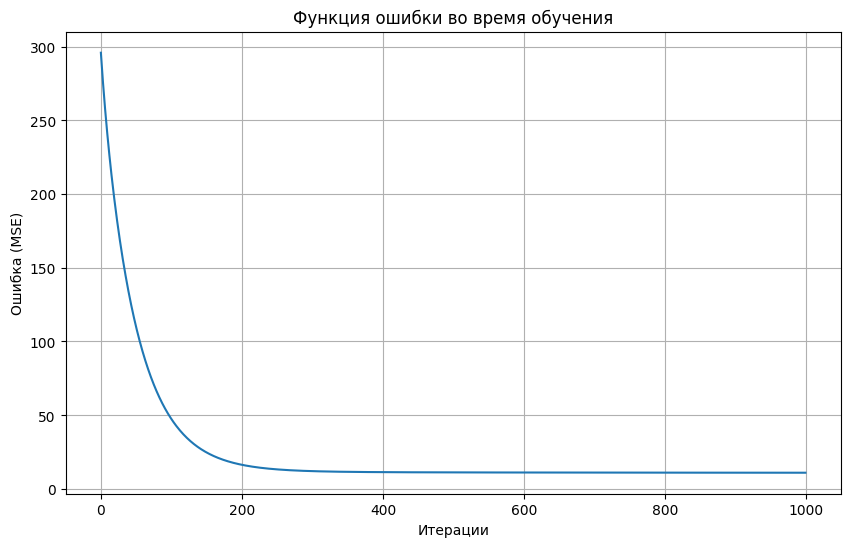

In [124]:
print("РЕЗУЛЬТАТЫ СРАВНЕНИЯ")
print(f"  MSE:  {mse_gd:.4f}")
print(f"  MAE:  {mae_gd:.4f}")

print("Sklearn:")
print(f"  MSE:  {mse_sklearn:.4f}")
print(f"  MAE:  {mae_sklearn:.4f}")

print("КОЭФФИЦИЕНТЫ ЛИНЕЙНОЙ РЕГРЕССИИ (ВЕСА)")

weights_gd, bias_gd = model_gd.get_params()
weights_sklearn = model_sklearn.coef_
bias_sklearn = model_sklearn.intercept_

print("Коэффициенты своей реализации:")
print(f"  Bias: {bias_gd:.6f}")
for i, feature in enumerate(selected_features):
    print(f"  {feature}: {weights_gd[i]:.6f}")

print("Коэффициенты sklearn:")
print(f"  Bias: {bias_sklearn:.6f}")
for i, feature in enumerate(selected_features):
    print(f"  {feature}: {weights_sklearn[i]:.6f}")

print("Разница между коэффициентами:")
print(f"  Bias: {abs(bias_gd - bias_sklearn):.8f}")
for i, feature in enumerate(selected_features):
    diff = abs(weights_gd[i] - weights_sklearn[i])
    print(f"  {feature}: {diff:.8f}")

print("УРАВНЕНИЕ ЛИНЕЙНОЙ РЕГРЕССИИ:")
equation = f"PRICE = {bias_gd:.4f}"
for feature, weight in zip(selected_features, weights_gd):
    sign = "+" if weight >= 0 else "-"
    equation += f" {sign} {abs(weight):.4f}*{feature}"
print(f"   {equation}")

def normalize_new_data(new_data, X_mean, X_std):
    normalized_data = []
    for j in range(len(new_data)):
        if X_std[j] != 0:
            normalized_data.append((new_data[j] - X_mean[j]) / X_std[j])
        else:
            normalized_data.append(0)
    return normalized_data

print("ПРИМЕР ПРЕДСКАЗАНИЯ С ФИКСИРОВАННЫМИ ЗНАЧЕНИЯМИ")
example_data = [np.mean(X_train_imputed[:, i]) for i in range(X_train_imputed.shape[1])]
print("Примерные значения признаков (средние значения):")
for i, feature in enumerate(selected_features):
    print(f"  {feature}: {example_data[i]:.4f}")

example_data_normalized = normalize_new_data(example_data, X_mean, X_std)
example_pred_gd = model_gd.predict([example_data_normalized])[0]
example_pred_sklearn = model_sklearn.predict([example_data_normalized])[0]

print(f"Предсказание цены:")
print(f" Свой алгоритм: {example_pred_gd:.2f}")
print(f"  Sklearn: {example_pred_sklearn:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(model_gd.cost_history)
plt.title('Функция ошибки во время обучения')
plt.xlabel('Итерации')
plt.ylabel('Ошибка (MSE)')
plt.grid(True)
plt.show()

ПРИМЕР ПРЕДСКАЗАНИЯ С ФИКСИРОВАННЫМИ ЗНАЧЕНИЯМИ
Примерные значения признаков:
  crim: 0.1
  zn: 20.0
  indus: 5.0
  chas: 0.0
  nox: 0.5
  rm: 6.5
  age: 50.0
  dis: 4.0
  rad: 5.0
  tax: 300.0
  ptratio: 15.0
  b: 390.0
  lstat: 5.5
Предсказание цены:
 Свой алгоритм: 31.30
  Sklearn: 31.59


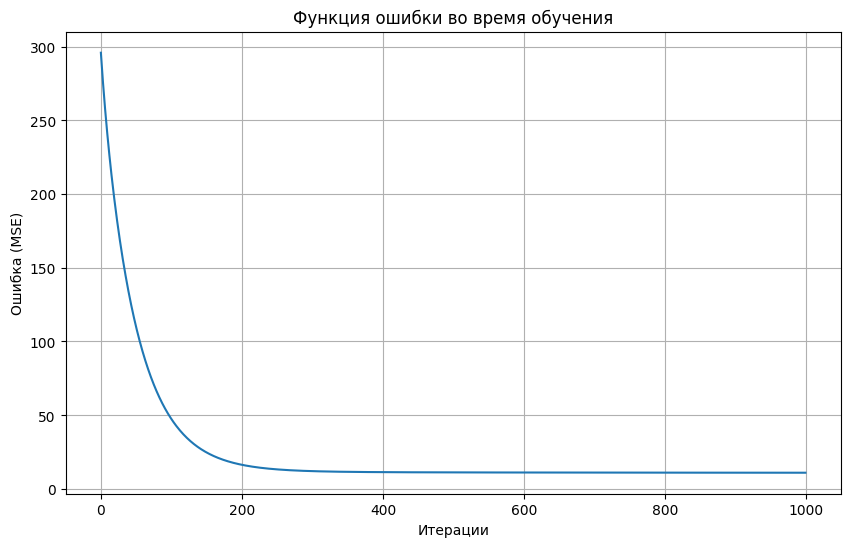

In [125]:
print("ПРИМЕР ПРЕДСКАЗАНИЯ С ФИКСИРОВАННЫМИ ЗНАЧЕНИЯМИ")

example_data = [0.1, 20.0, 5.0, 0.0, 0.5, 6.5, 50.0, 4.0, 5.0, 300.0, 15.0, 390.0, 5.5]


if len(example_data) != len(selected_features):
    print(f" Количество значений ({len(example_data)}) не совпадает с количеством признаков ({len(selected_features)})")
    while len(example_data) < len(selected_features):
        example_data.append(np.mean(X_train_imputed[:, len(example_data)]))
    example_data = example_data[:len(selected_features)]

print("Примерные значения признаков:")
for i, feature in enumerate(selected_features):
    print(f"  {feature}: {example_data[i]}")

example_data_normalized = normalize_new_data(example_data, X_mean, X_std)
example_pred_gd = model_gd.predict([example_data_normalized])[0]
example_pred_sklearn = model_sklearn.predict([example_data_normalized])[0]

print(f"Предсказание цены:")
print(f" Свой алгоритм: {example_pred_gd:.2f}")
print(f"  Sklearn: {example_pred_sklearn:.2f}")
plt.figure(figsize=(10, 6))
plt.plot(model_gd.cost_history)
plt.title('Функция ошибки во время обучения')
plt.xlabel('Итерации')
plt.ylabel('Ошибка (MSE)')
plt.grid(True)
plt.show()




СРАВНЕНИЕ МОДЕЛЕЙ
Своя реализация :
  MSE:  25.4524
  MAE:  3.2278

Sklearn :
  MSE:  24.3825
  MAE:  3.2042
СРАВНЕНИЕ:
 MSE: Лучше sklearn
 MAE: Лучше sklearn
 Общее: Sklearn лучше на 4.20% по MSE


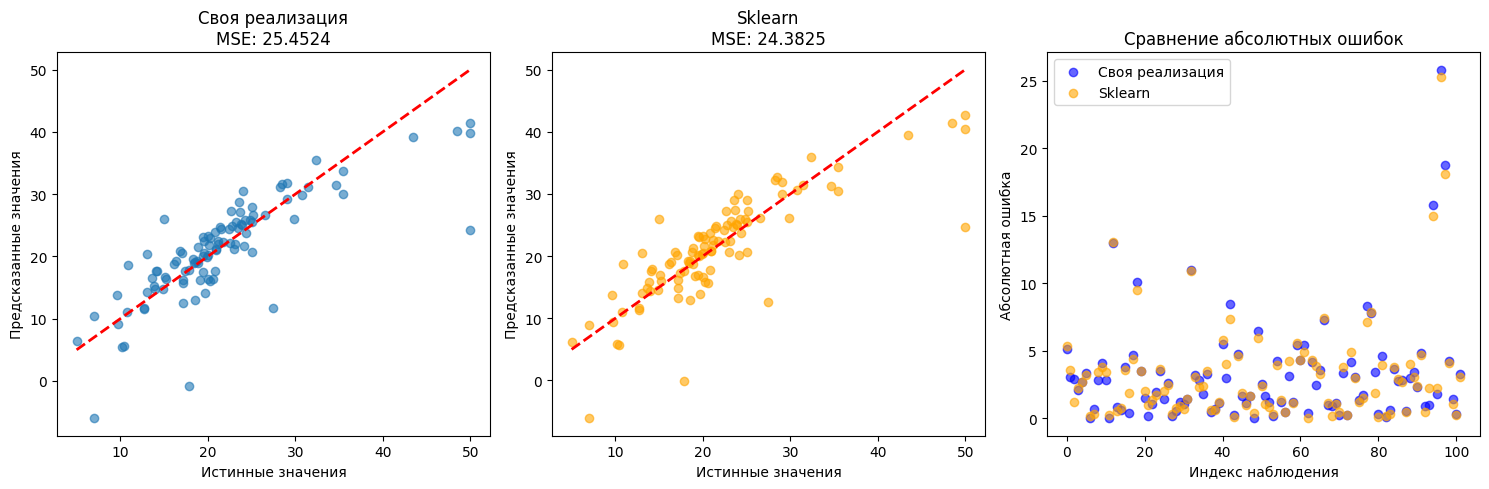

In [127]:
def compare_models(y_true, y_pred_gd, y_pred_sklearn):

    mse_gd = mean_squared_error(y_true, y_pred_gd)
    mae_gd = mean_absolute_error(y_true, y_pred_gd)

    mse_sklearn = mean_squared_error(y_true, y_pred_sklearn)
    mae_sklearn = mean_absolute_error(y_true, y_pred_sklearn)

    print("СРАВНЕНИЕ МОДЕЛЕЙ")

    print("Своя реализация :")
    print(f"  MSE:  {mse_gd:.4f}")
    print(f"  MAE:  {mae_gd:.4f}")

    print("\nSklearn :")
    print(f"  MSE:  {mse_sklearn:.4f}")
    print(f"  MAE:  {mae_sklearn:.4f}")
    print("СРАВНЕНИЕ:")
    if mse_gd < mse_sklearn:
        print(" MSE: Лучше своя реализация")
    else:
        print(" MSE: Лучше sklearn")

    if mae_gd < mae_sklearn:
        print(" MAE: Лучше своя реализация")
    else:
        print(" MAE: Лучше sklearn")

    if mse_gd < mse_sklearn:
        difference = ((mse_sklearn - mse_gd) / mse_sklearn) * 100
        print(f" Общее: Своя реализация лучше на {difference:.2f}% по MSE")
    elif mse_sklearn < mse_gd:
        difference = ((mse_gd - mse_sklearn) / mse_gd) * 100
        print(f" Общее: Sklearn лучше на {difference:.2f}% по MSE")
    else:
        print(" Общее: Модели показали одинаковый результат по MSE")

compare_models(y_test, y_pred_gd, y_pred_sklearn)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_gd, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title(f'Своя реализация\nMSE: {mean_squared_error(y_test, y_pred_gd):.4f}')

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_sklearn, alpha=0.6, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title(f'Sklearn\nMSE: {mean_squared_error(y_test, y_pred_sklearn):.4f}')

plt.subplot(1, 3, 3)
diff_gd = abs(y_test - y_pred_gd)
diff_sklearn = abs(y_test - y_pred_sklearn)
plt.scatter(range(len(diff_gd)), diff_gd, alpha=0.6, label='Своя реализация', color='blue')
plt.scatter(range(len(diff_sklearn)), diff_sklearn, alpha=0.6, label='Sklearn', color='orange')
plt.xlabel('Индекс наблюдения')
plt.ylabel('Абсолютная ошибка')
plt.title('Сравнение абсолютных ошибок')
plt.legend()

plt.tight_layout()
plt.show()